<a href="https://colab.research.google.com/github/Anjali-K-S25/AI_da/blob/main/Ai_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers torch scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers

In [ ]:
import random
import pandas as pd

# Dream templates for each emotion
dream_templates = {
    "peace": [
        "I was floating on a calm lake under the stars",
        "I saw a serene waterfall in a forest",
        "I was lying in a meadow with soft sunlight",
        "I was meditating on a mountaintop in silence"
    ],
    "anxiety": [
        "I was lost in a huge unfamiliar city",
        "I was late for an important exam and couldn’t find the hall",
        "I was running from something invisible in a maze",
        "I was stuck in traffic while missing a flight"
    ],
    "fear": [
        "I was falling endlessly into a black void",
        "I was being chased by shadows in a haunted house",
        "I was locked in a room and couldn’t escape",
        "I saw a loved one disappearing into smoke"
    ],
    "happiness": [
        "I was celebrating my birthday with all my friends",
        "I was dancing at a colorful festival with lights",
        "I met my childhood friend after many years",
        "I was petting playful puppies in a park"
    ]
}

# Generate 100 dream entries
dreams = []
emotions = []

for _ in range(25):
    for emotion, templates in dream_templates.items():
        dream = random.choice(templates) + random.choice([
            ".", " It felt so real.", " Then I woke up smiling.",
            " It made me feel calm.", " I couldn't forget it all day."
        ])
        dreams.append(dream)
        emotions.append(emotion)

dream_data = pd.DataFrame({'dream': dreams, 'emotion': emotions})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dream_data['label'] = le.fit_transform(dream_data['emotion'])

X_train, X_test, y_train, y_test = train_test_split(
    dream_data['dream'], dream_data['label'], test_size=0.5, random_state=42)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

class DreamDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, return_tensors="pt")
        self.labels = torch.tensor(labels.tolist())

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': self.labels[idx]
        }

train_dataset = DreamDataset(X_train, y_train)
test_dataset = DreamDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

NameError: name 'X_train' is not defined

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel
from torch.optim import AdamW

# Define model class
class DreamClassifier(nn.Module):
    def __init__(self, num_labels):
        super(DreamClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained('distilbert-base-uncased')
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(768, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = self.relu(outputs.last_hidden_state[:, 0, :])  # [CLS] token
        x = self.dropout(x)
        return self.classifier(x)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model
model = DreamClassifier(num_labels=len(le.classes_)).to(device)

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = nn.CrossEntropyLoss()

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Store metrics for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Move model to train mode
model.train()
EPOCHS = 13

for epoch in range(EPOCHS):
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # ====== Validation ======
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = loss_fn(outputs, labels)

            total_val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{EPOCHS} → Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    model.train()  # set back to training mode

Epoch 1/13 → Train Loss: 1.3624, Train Acc: 0.3600, Val Loss: 1.0828, Val Acc: 0.6600
Epoch 2/13 → Train Loss: 0.7882, Train Acc: 0.8600, Val Loss: 0.5180, Val Acc: 0.9600
Epoch 3/13 → Train Loss: 0.3795, Train Acc: 0.9800, Val Loss: 0.1687, Val Acc: 0.9800
Epoch 4/13 → Train Loss: 0.1354, Train Acc: 1.0000, Val Loss: 0.0733, Val Acc: 1.0000
Epoch 5/13 → Train Loss: 0.0740, Train Acc: 1.0000, Val Loss: 0.0413, Val Acc: 1.0000
Epoch 6/13 → Train Loss: 0.0452, Train Acc: 1.0000, Val Loss: 0.0288, Val Acc: 1.0000
Epoch 7/13 → Train Loss: 0.0362, Train Acc: 1.0000, Val Loss: 0.0225, Val Acc: 1.0000
Epoch 8/13 → Train Loss: 0.0281, Train Acc: 1.0000, Val Loss: 0.0187, Val Acc: 1.0000
Epoch 9/13 → Train Loss: 0.0225, Train Acc: 1.0000, Val Loss: 0.0161, Val Acc: 1.0000
Epoch 10/13 → Train Loss: 0.0214, Train Acc: 1.0000, Val Loss: 0.0142, Val Acc: 1.0000
Epoch 11/13 → Train Loss: 0.0166, Train Acc: 1.0000, Val Loss: 0.0127, Val Acc: 1.0000
Epoch 12/13 → Train Loss: 0.0164, Train Acc: 1.0000,

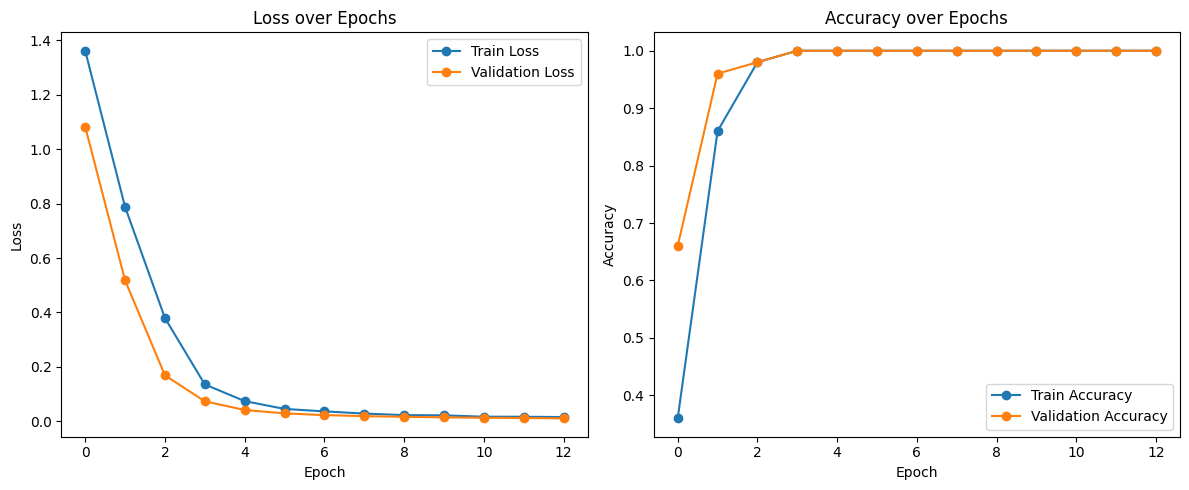

In [ ]:
# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import torch

# --- AI Prediction Logic ---
def predict_dream(dream_text):
    model.eval()
    with torch.no_grad():
        tokens = tokenizer(dream_text, truncation=True, padding=True, return_tensors="pt").to(device)
        outputs = model(input_ids=tokens["input_ids"], attention_mask=tokens["attention_mask"])
        probs = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        pred_label = le.inverse_transform([probs.argmax()])[0]

        result = f"## Emotional Condition: `{pred_label}`\n\n"
        result += "### Confidence Levels:\n"
        for i, label in enumerate(le.classes_):
            result += f"- {label}: **{probs[i]*100:.2f}%**\n"
        return result, "output"

# --- FAQ Content ---
faq_content = """
### Frequently Asked Questions (FAQ)

**1. What is this app for?**
This application is designed to analyze the content of dreams using artificial intelligence. By processing your dream description, the model predicts the emotional or psychological condition likely associated with it.

**2. How does it work?**
The model is trained on a labeled dataset of dream texts using a transformer-based neural network. It identifies emotional patterns by analyzing linguistic cues and structures in your written description.

**3. Can I input nightmares or lucid dreams?**
Yes, the model accepts all types of dreams—nightmares, lucid dreams, recurring dreams, or symbolic ones. The more descriptive your input, the better the model can analyze it.

**4. Is this medical advice?**
No, this is an experimental AI-based analysis tool and is not intended for diagnosis or therapy. It should not replace consultation with a mental health professional.

**5. What emotions can it detect?**
The system is trained to recognize a range of emotional states such as calmness, fear, anxiety, sadness, joy, and stress. These are generalized categories based on the language in your dream.

**6. Will my input be saved?**
No, your input is not saved or stored anywhere by this application. It runs in a temporary session and processes your data locally during the session only.

**7. Can I use it on my phone?**
Yes, the interface is mobile-friendly and works in mobile browsers. You can input your dream and view results just as you would on a desktop.

**8. Is the result explainable?**
Currently, the app provides the prediction and confidence levels, but it does not provide detailed explainability. Future versions may include XAI (Explainable AI) tools like SHAP or LIME to explain predictions.

**9. Can I trust the prediction?**
The prediction is based on trained data and language modeling but is not 100% accurate. It's best used for exploration and reflection rather than for making conclusions about your mental health.

**10. How to improve prediction?**
Give detailed and vivid dream descriptions with context, emotions, events, and how you felt during and after the dream. More specific input leads to more meaningful predictions.

**11. Can this be integrated into other platforms?**
Yes, the backend model can be exported or deployed as an API and integrated into mobile apps, websites, or other mental health and wellness platforms for research or experimentation.
"""

# --- Gradio Interface ---
with gr.Blocks(title="Dream Emotion Analyzer") as demo:
    current_screen = gr.State("input")

    with gr.Column(visible=True) as input_screen:
        gr.Markdown("## 🧠 Dream Emotion Analyzer")
        gr.Markdown("Enter your dream description below. Our AI will analyze it and detect possible emotional conditions.")

        dream_input = gr.Textbox(label="Enter Your Dream", lines=5, placeholder="Describe your dream here...")
        analyze_btn = gr.Button("Analyse Dream")
        faq_btn = gr.Button("View FAQ")

    with gr.Column(visible=False) as output_screen:
        gr.Markdown("## 🔍 Analysis Result")
        result_output = gr.Markdown()
        back_btn = gr.Button("Back to Input")

    with gr.Column(visible=False) as faq_screen:
        gr.Markdown("## 📘 Frequently Asked Questions")
        gr.Markdown(faq_content)
        back_btn_faq = gr.Button("Back to Input")

    def handle_analyze(text):
        result, nav = predict_dream(text)
        return result, gr.update(visible=False), gr.update(visible=True), gr.update(visible=False)

    def go_back():
        return gr.update(visible=True), gr.update(visible=False), gr.update(visible=False)

    def go_faq():
        return gr.update(visible=False), gr.update(visible=False), gr.update(visible=True)

    analyze_btn.click(fn=handle_analyze, inputs=dream_input,
                      outputs=[result_output, input_screen, output_screen, faq_screen])

    back_btn.click(fn=go_back, outputs=[input_screen, output_screen, faq_screen])
    faq_btn.click(fn=go_faq, outputs=[input_screen, output_screen, faq_screen])
    back_btn_faq.click(fn=go_back, outputs=[input_screen, output_screen, faq_screen])

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2849879b1a85ec7aef.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
